<h1><div class="alert alert-block alert-info">
Time Series - ARIMA Models
</div></h1>

Given a time series of data $X_t$ , the ARMA model is a tool for understanding and, perhaps, predicting future values in this series. The AR part involves regressing the variable on its own lagged (i.e., past) values. The MA part involves modeling the error term as a linear combination of error terms occurring contemporaneously and at various times in the past. The model is usually referred to as the ARMA(p,q) model where p is the order of the AR part and q is the order of the MA part (as defined below).

<i>Source: https://en.wikipedia.org/wiki/Autoregressive%E2%80%93moving-average_model</i>

<hr><h2>Autoregressive models $AR_p$</h2>

The autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term); thus the model is in the form of a stochastic difference equation. The AR(p) model is written:

${\displaystyle X_{t}=c+\sum _{i=1}^{p}\varphi _{i}X_{t-i}+\varepsilon _{t}.\,}$.\,
where ${\displaystyle \varphi _{1},\ldots ,\varphi _{p}}\varphi _{1},\ldots ,\varphi _{p}$ are parameters, ${\displaystyle c}$ is a constant, and the random variable ${\displaystyle \varepsilon _{t}}$ is white noise.

Some constraints are necessary on the values of the parameters so that the model remains stationary. For example, processes in the AR(1) model with ${\displaystyle |\varphi _{1}|\geq 1}{\displaystyle |\varphi _{1}|\geq 1}$ are not stationary.

<b>Properties:</b>
- autocorrelation $\rho (h)$ exponentialy decreases to 0 when $h \rightarrow \infty$
- partial autocorrelation r(h) is null for all h > p, and is equal to $a_p$ at order p:

$r(h) = 0$,  $ \forall h > p$,

$r(p) = a_p$.

In [29]:
options(repr.plot.width=15, repr.plot.height=10)

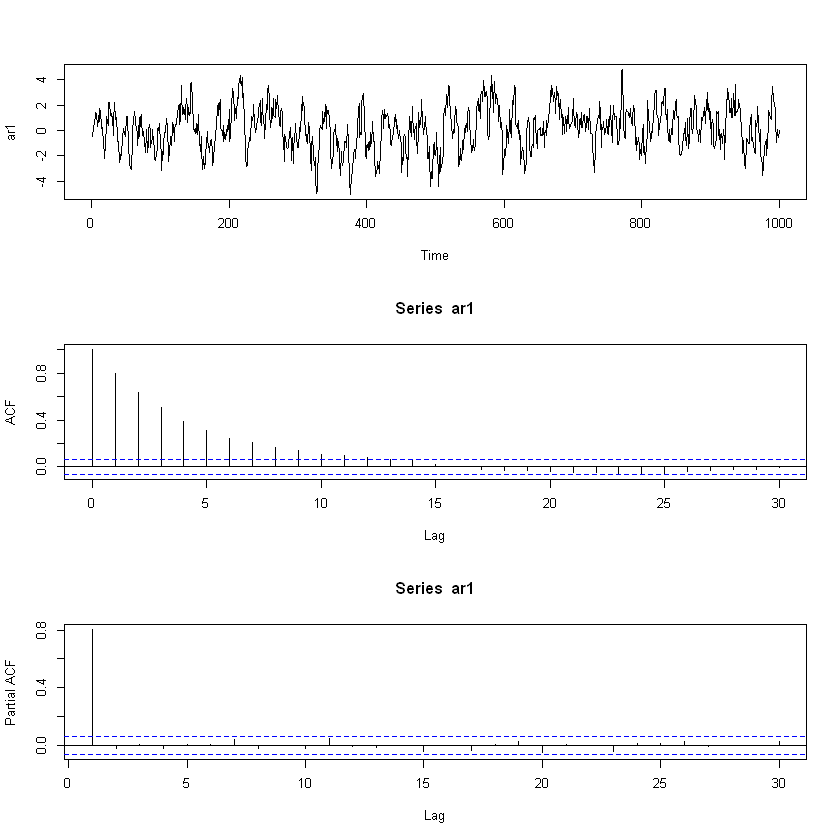

In [3]:
par(mfrow=c(3,1))
modele<-list(ar=c(0.8))
ar1<-arima.sim(modele,1000)
plot.ts(ar1)
acf(ar1)
pacf(ar1)

<b>Remark:</b> Here we see that the ACF decreases in an exponential rate, and that according to PACF we should use p=1 to forecast the series.

<hr>
<h2>Moving average models $MA_q$</h2>

In time series analysis, the moving-average model (MA model), also known as moving-average process, is a common approach for modeling univariate time series. The moving-average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.

$X_{t}=\mu +\varepsilon _{t}+\sum _{i=1}^{q}\theta _{i}\varepsilon _{t-i}\$

<b>Properties:</b>
- autocorrelation $\rho (h)$ is null for all $h > q$
- partial autocorrelation exponentialy decreases to 0 when
$h \rightarrow \infty$
- any ARp can be seen as an $MA_\infty$
- under some conditions on the $b_j$ , an MAq can be seen as an ARp

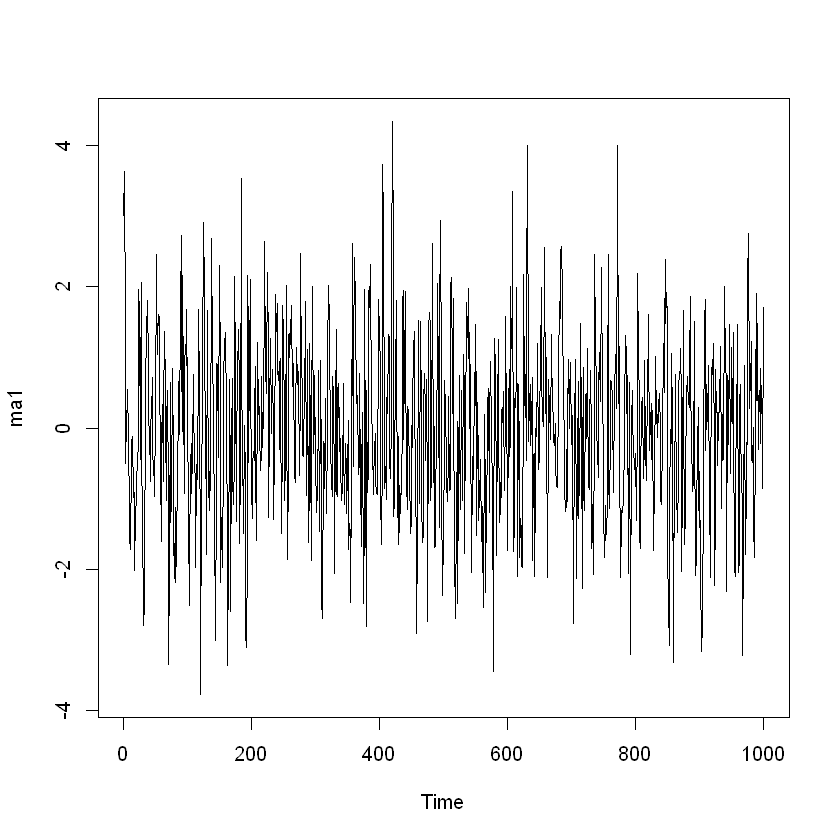

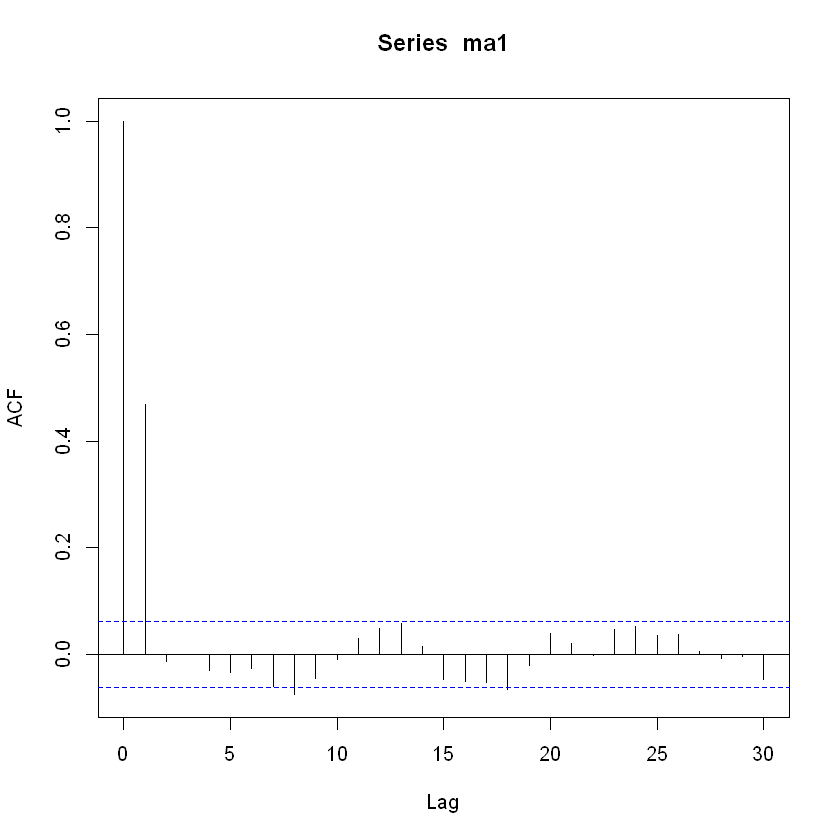

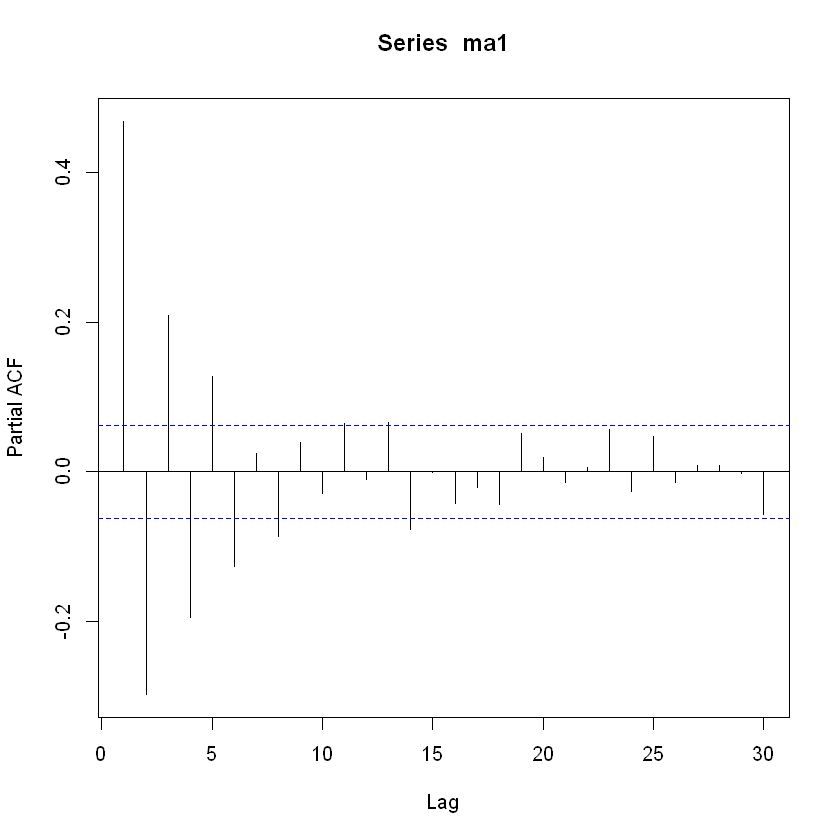

In [4]:
modele<-list(ma=c(0.8))
ma1<-arima.sim(modele,1000)
plot.ts(ma1)
acf(ma1)
pacf(ma1)

<b>Remark: </b> Here we see that the ACF is null for q = 2, partial autocorrelation decreases exponentialy.

<hr>
<h2>Autoregressive moving average model ARMApq</h2>

In the statistical analysis of time series, autoregressive–moving-average (ARMA) models provide a parsimonious description of a (weakly) stationary stochastic process in terms of two polynomials, one for the autoregression (AR) and the second for the moving average (MA). 

$X_{t}=c+\varepsilon _{t}+\sum _{i=1}^{p}\varphi _{i}X_{t-i}+\sum _{i=1}^{q}\theta _{i}\varepsilon _{t-i}.\$

<b>Property:</b> Autocorrelation of an ARMAp,q exponentially descreases to 0 when $h  \rightarrow \infty$, from order q + 1.

<hr>
<h2>Non-seasonal ARIMA models</h2>

ARIMA stands for Auto Regressive Integrated Moving Average, its model includes autoregressive terms, moving average terms, and differencing operations.

$x_t$ is an $ARIMA_{p,d,q}$ model if dxt is an ARMAp,q model (dxt is xt differenced d times)

- ARIMA(0,1,0) = random walk
- ARIMA(0,1,1) without constant = simple exponential smoothing
- ARIMA(0,2,1) without constant = linear exponential smoothing
- ARIMA(1,1,2) with constant = damped-trend linear exponential
smoothing

In practice, you have two choices, depending on your goal:
- let’s start by differencing the series if needed, in order to obtain
something visually stationary
- look at the ACF and PACF plot ot identify possible models
- take eventually into account knowledge on the series (knwon
autocorrelation. . . )
- estimate models and select the best one by AICc / AIC / BIC

Loading required package: ggplot2

Loading required package: forecast

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: fma

Loading required package: expsmooth



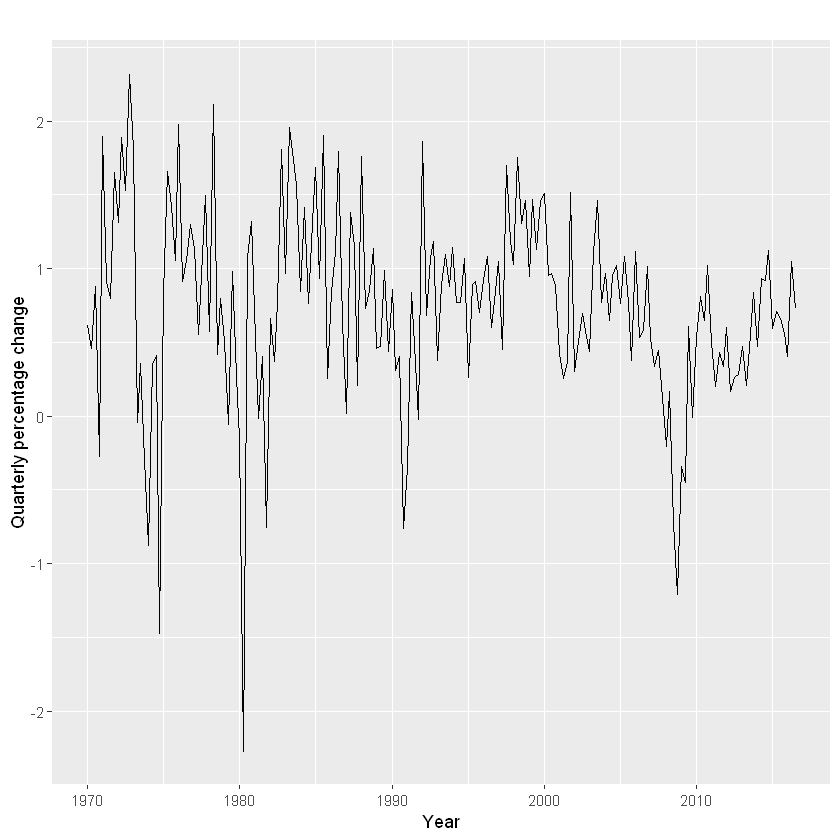

In [5]:
library(fpp2)
autoplot(uschange[,"Consumption"]) +
xlab("Year") + ylab("Quarterly percentage change")

In [6]:
auto.arima(uschange[,"Consumption"])

Series: uschange[, "Consumption"] 
ARIMA(1,0,3)(1,0,1)[4] with non-zero mean 

Coefficients:
          ar1     ma1     ma2     ma3     sar1    sma1    mean
      -0.3548  0.5958  0.3437  0.4111  -0.1376  0.3834  0.7460
s.e.   0.1592  0.1496  0.0960  0.0825   0.2117  0.1780  0.0886

sigma^2 estimated as 0.3481:  log likelihood=-163.34
AIC=342.67   AICc=343.48   BIC=368.52

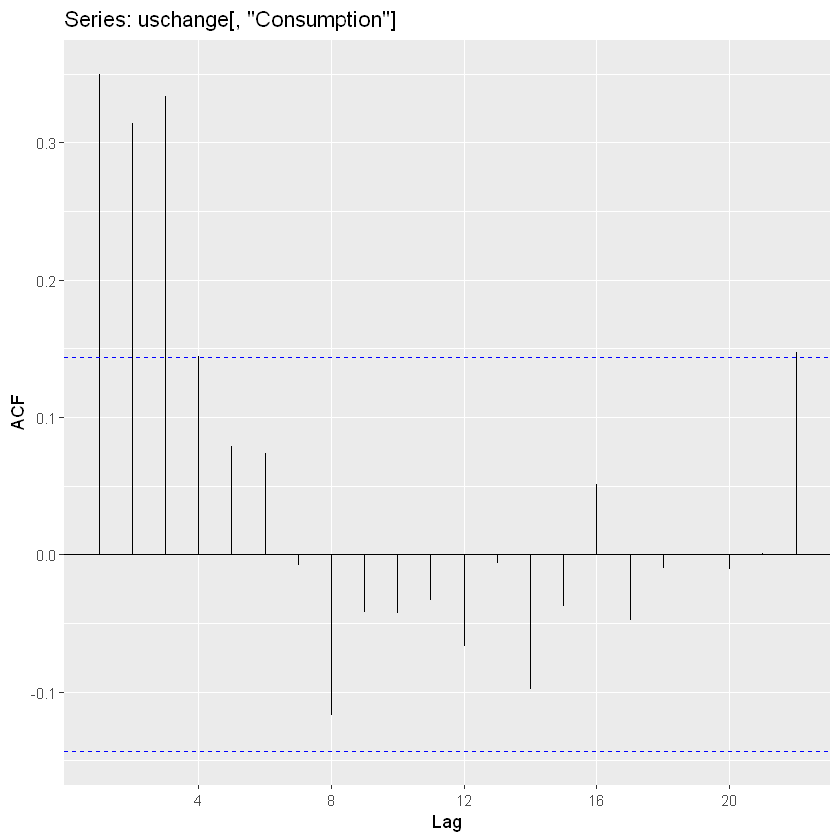

In [7]:
ggAcf(uschange[,"Consumption"])

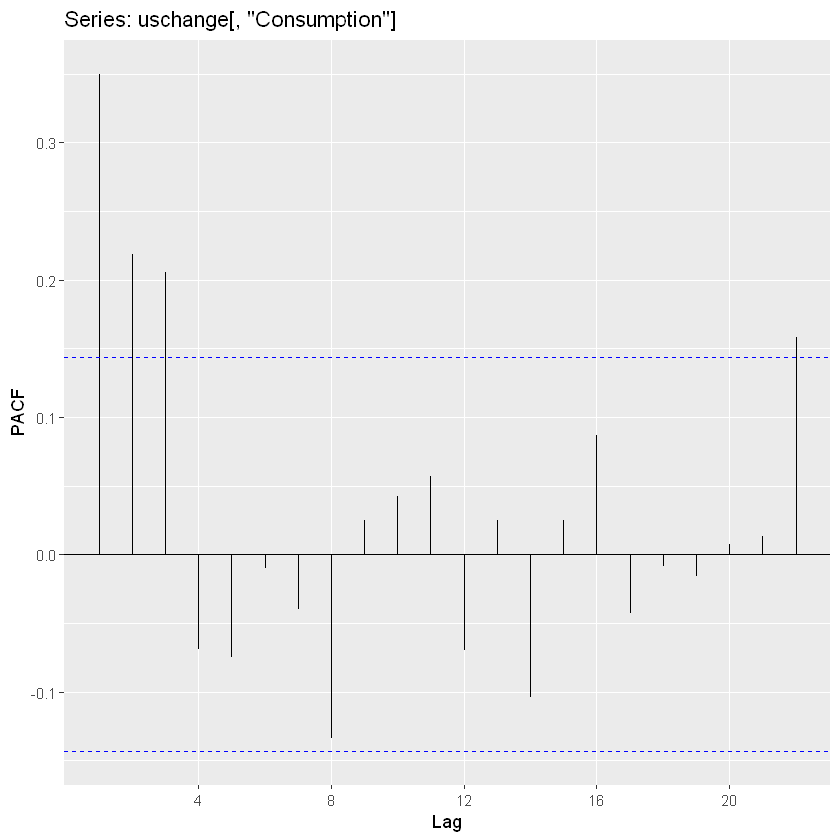

In [8]:
ggPacf(uschange[,"Consumption"])

<b>Remark:</b> Looking at ACF and PACF we would choose $AR_3$ or $MA_3$

In [13]:
fit = Arima(uschange[,"Consumption"],order=c(3,0,0))
fit

Series: uschange[, "Consumption"] 
ARIMA(3,0,0) with non-zero mean 

Coefficients:
         ar1     ar2     ar3    mean
      0.2274  0.1604  0.2027  0.7449
s.e.  0.0713  0.0723  0.0712  0.1029

sigma^2 estimated as 0.3494:  log likelihood=-165.17
AIC=340.34   AICc=340.67   BIC=356.5

In [15]:
fit = Arima(uschange[,"Consumption"],order=c(0,0,3))
fit

Series: uschange[, "Consumption"] 
ARIMA(0,0,3) with non-zero mean 

Coefficients:
         ma1     ma2     ma3    mean
      0.2403  0.2187  0.2665  0.7473
s.e.  0.0717  0.0719  0.0635  0.0739

sigma^2 estimated as 0.354:  log likelihood=-166.38
AIC=342.76   AICc=343.09   BIC=358.91

In [17]:
fit = Arima(uschange[,"Consumption"],order=c(3,0,3))
fit

Series: uschange[, "Consumption"] 
ARIMA(3,0,3) with non-zero mean 

Coefficients:
         ar1     ar2      ar3      ma1      ma2     ma3    mean
      0.5145  0.4530  -0.3675  -0.2769  -0.3564  0.4576  0.7462
s.e.  0.3272  0.2457   0.2533   0.3111   0.2241  0.1678  0.0871

sigma^2 estimated as 0.3514:  log likelihood=-164.2
AIC=344.4   AICc=345.21   BIC=370.25

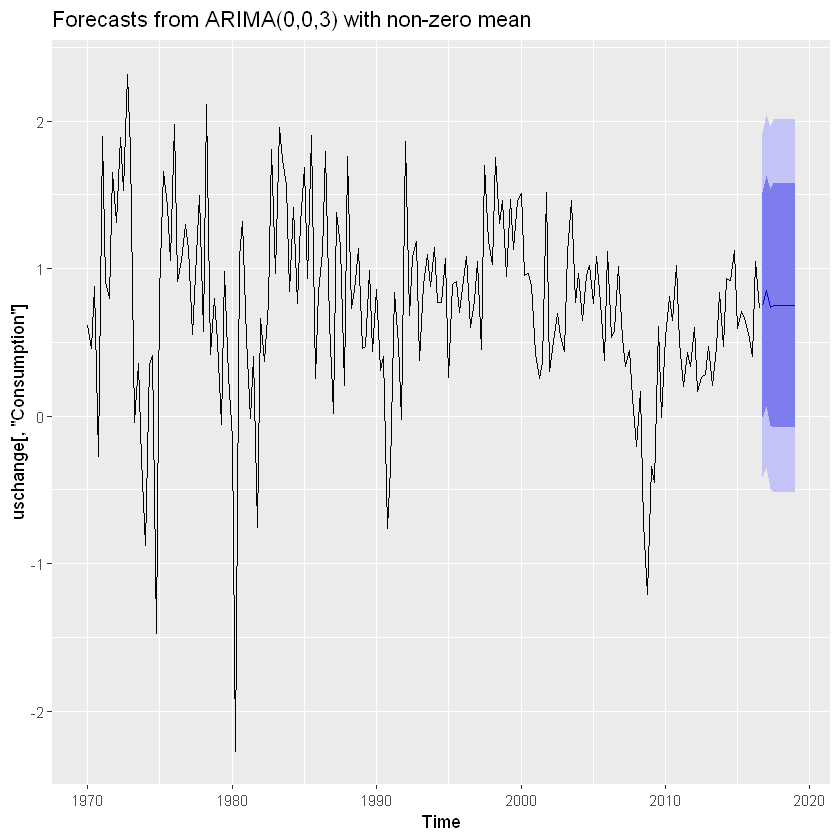

In [16]:
autoplot(forecast(fit,h=10))

<hr>
<h2>Seasonal ARIMA models</h2>

A seasonnal ARIMA (SARIMA) model is formed by including additional seasonal terms in an ARIMA.

The seasonal part of an AR or MA model can be seen in the seasonal lags of the PACF and ACF.

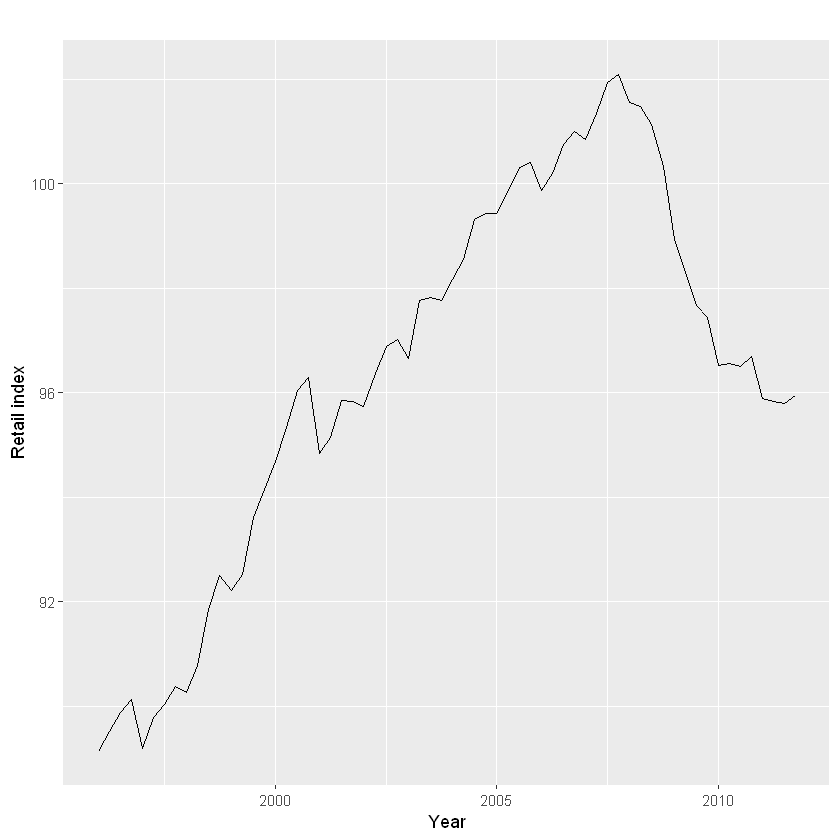

In [18]:
autoplot(euretail) + ylab("Retail index") + xlab("Year")

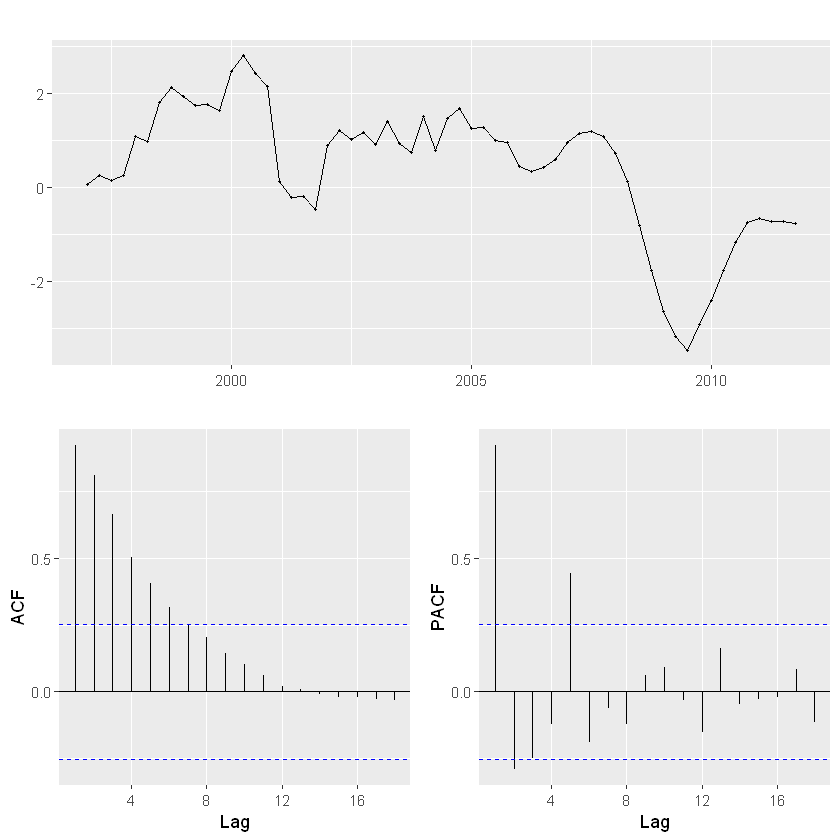

In [19]:
ggtsdisplay(diff(euretail,lag=4))

The linear decay of the ACF suggests that there is still a trend, so lets differentiate again:

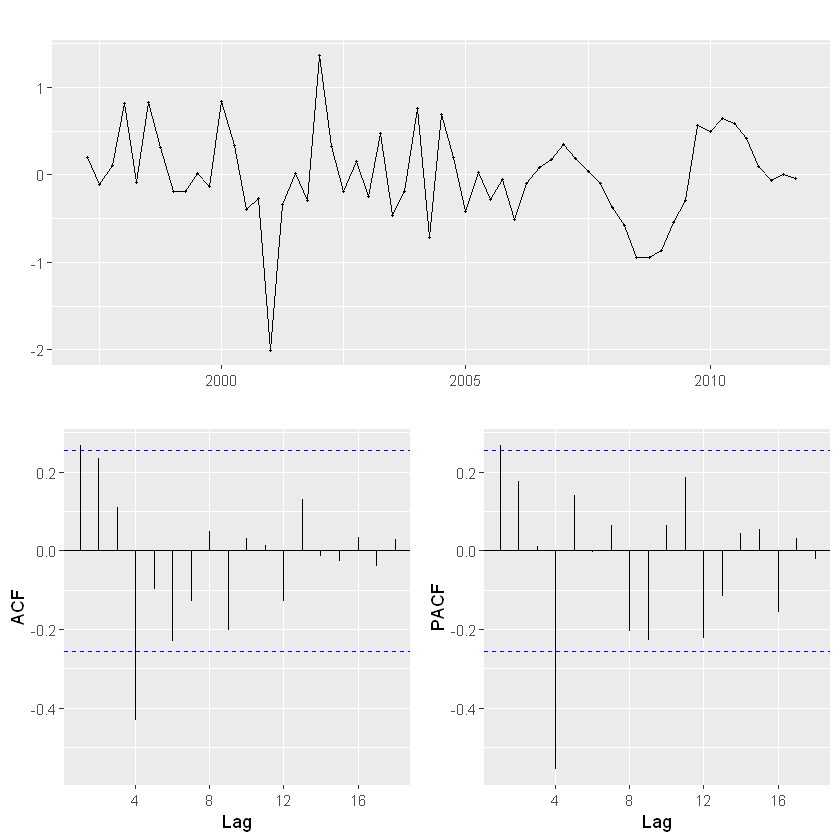

In [20]:
euretail %>% diff(lag=4) %>% diff() %>% ggtsdisplay()

- the slightly significant ACF at lag 1 suggests a non-seasonnal $MA_1$
- the significant ACF at lag 4 (the size of the period) suggests a
seasonnal $MA_1$
Consequently we can try an $SARIMA(0,1,1)(0,1,1)_4$ .
<b>Rk:</b> similar reasoning with PACF suggests $SARIMA(1,1,0)(1,1,0)_4$

In [22]:
fit=Arima(euretail, order=c(0,1,1), seasonal=c(0,1,1))

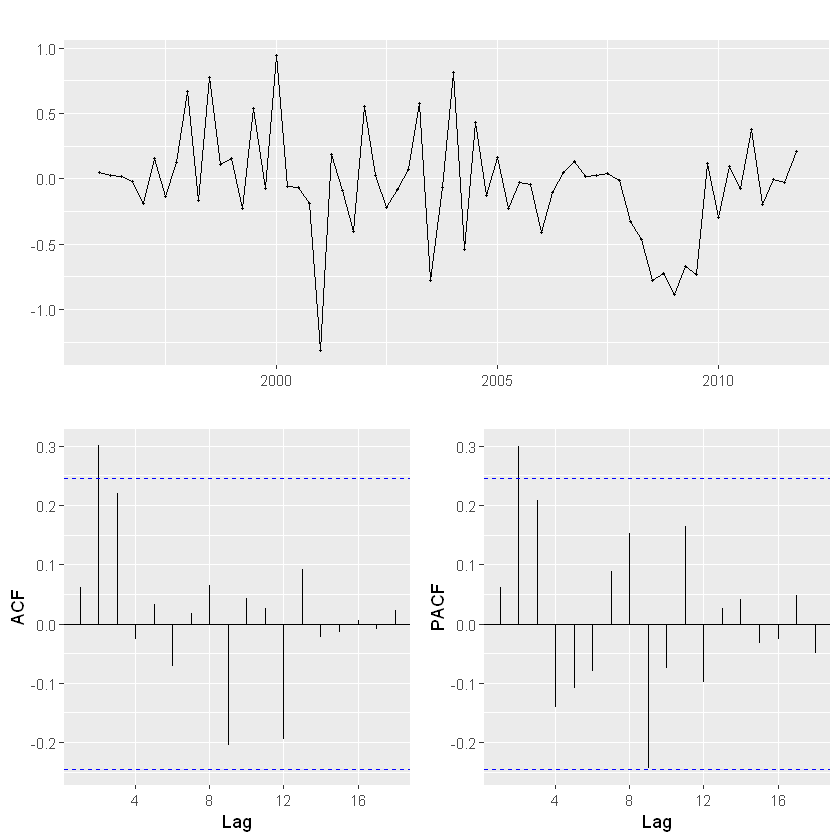

In [23]:
fit %>% residuals() %>% ggtsdisplay()

There is still significant ACF and PACF at lag 2. We can add some
additional non-seasonal terms (for instance with
SARIMA(0,1,2)(0,1,1)4)

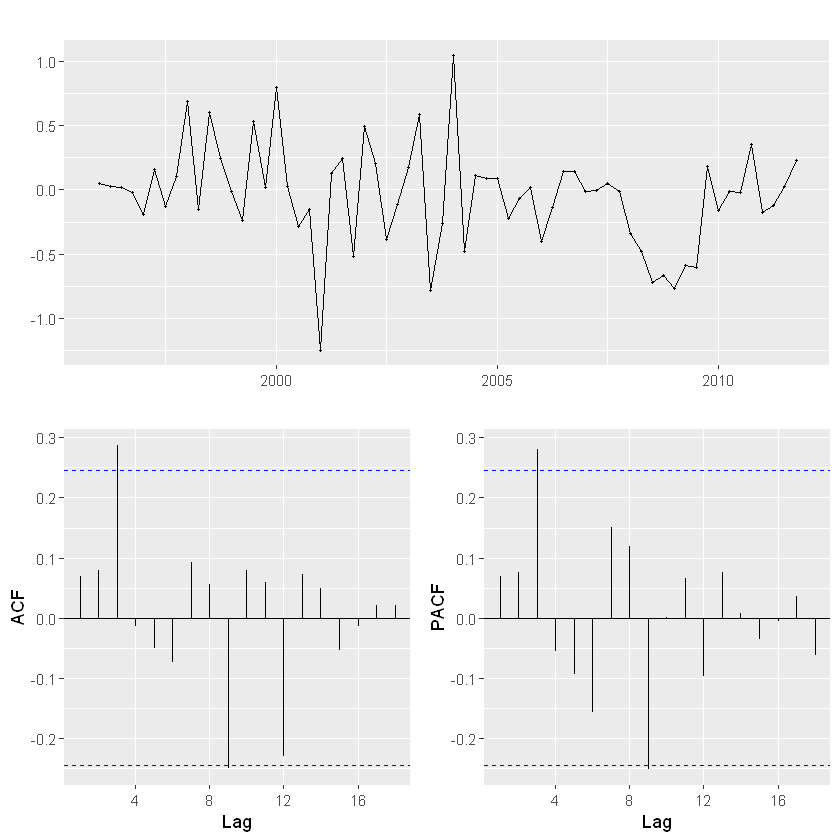

In [24]:
euretail %>%
Arima(order=c(0,1,2), seasonal=c(0,1,1)) %>%
residuals() %>% ggtsdisplay()

There is still significant ACF and PACF at lag 3.

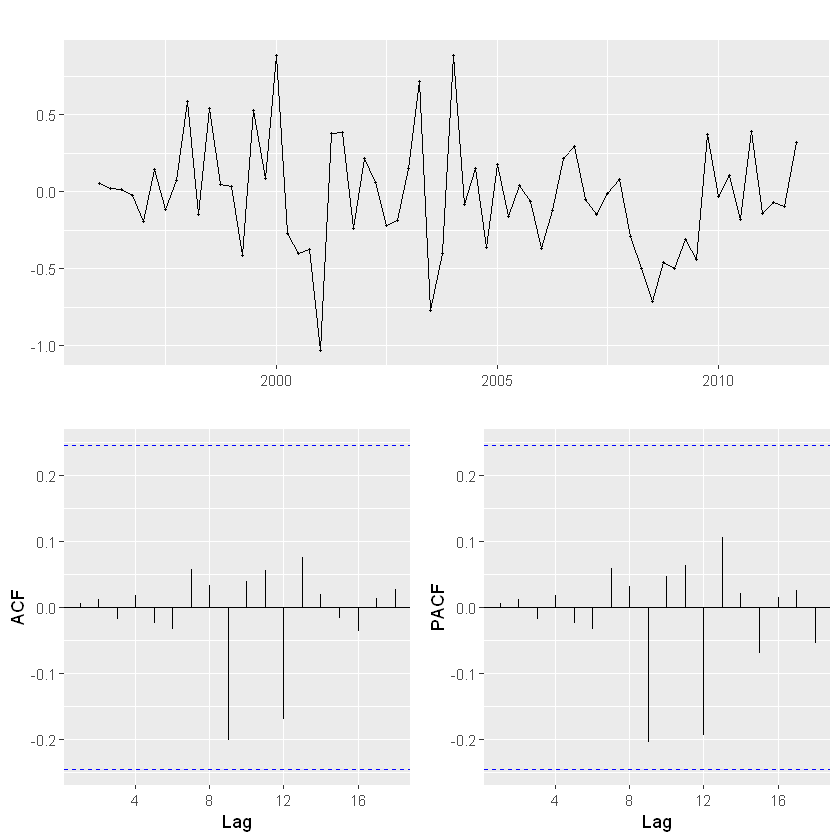

In [25]:
fit=Arima(euretail, order=c(0,1,3), seasonal=c(0,1,1))
fit %>% residuals() %>% ggtsdisplay()

Now the model seems to have capture all auto-correlations.


	Ljung-Box test

data:  Residuals from ARIMA(0,1,3)(0,1,1)[4]
Q* = 0.51128, df = 4, p-value = 0.9724

Model df: 4.   Total lags used: 8



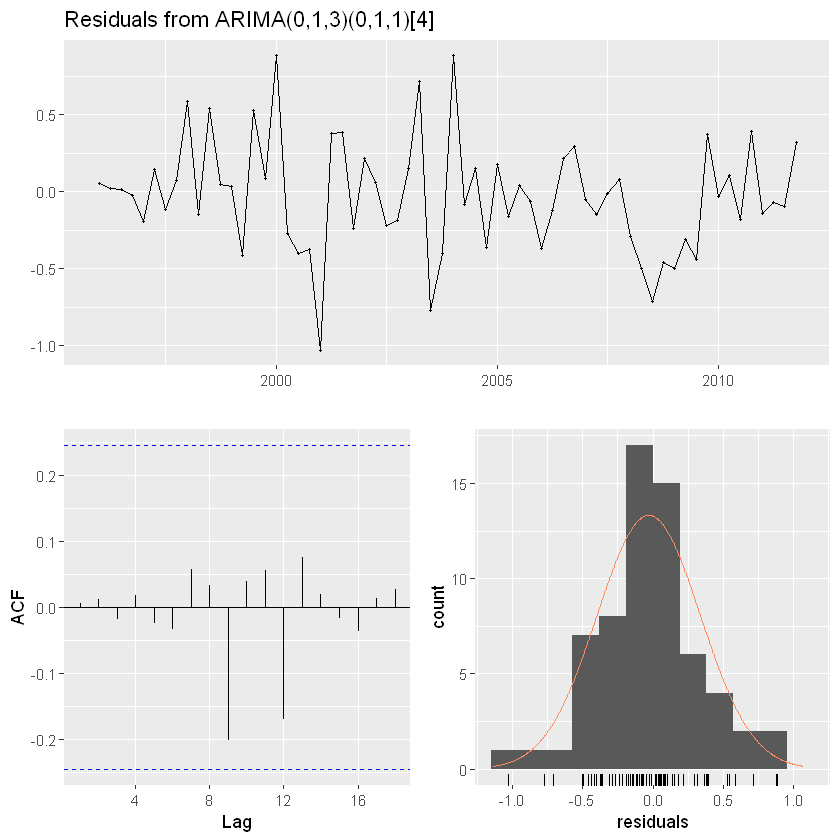

In [26]:
checkresiduals(fit)

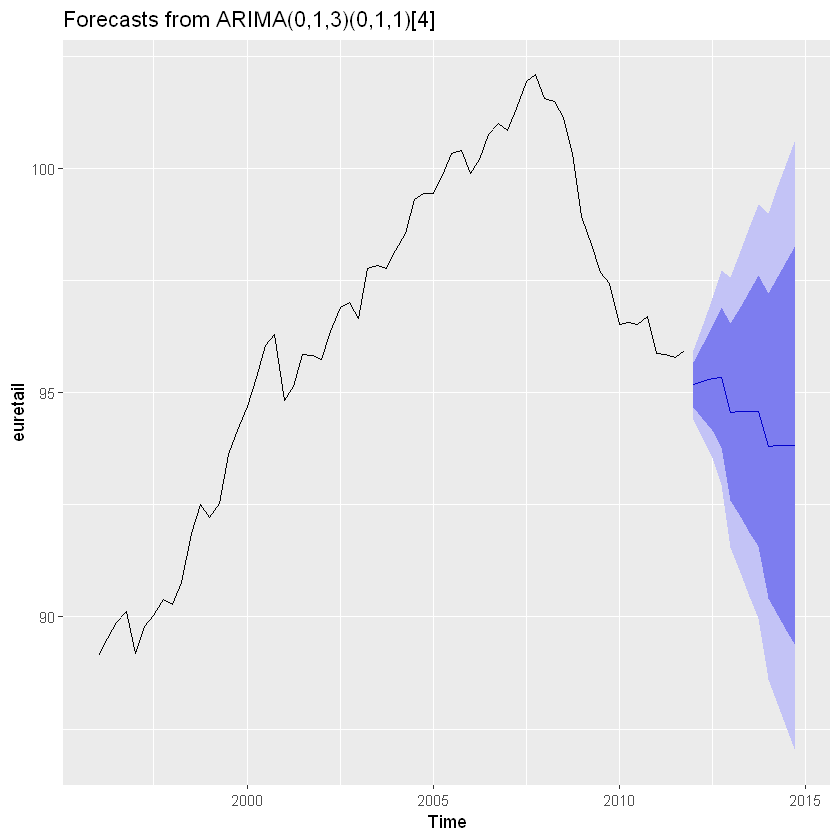

In [27]:
fit %>% forecast(h=12) %>% autoplot()

<hr>
<h2>ARCH and GARCH</h2>

ARCH stands for autoregressive conditional heteroscedasticity and GARCH is its generalized version.

Such techniques allows to stabilize a variance which monotically increases or decreases <b>heteroscedascity</b>. To stabilize the variance we can use Box-Cox transformation:

$y_t = {(log(x_t)} $ if $\lambda = 0$

$y_t = \frac{(x_t^\lambda − 1)}{\lambda$}$ if $\lambda \geq 0$

The AirPassengers data shows that the variance increases overtime, so it's possible to use a log transformation to be able to run a regression.

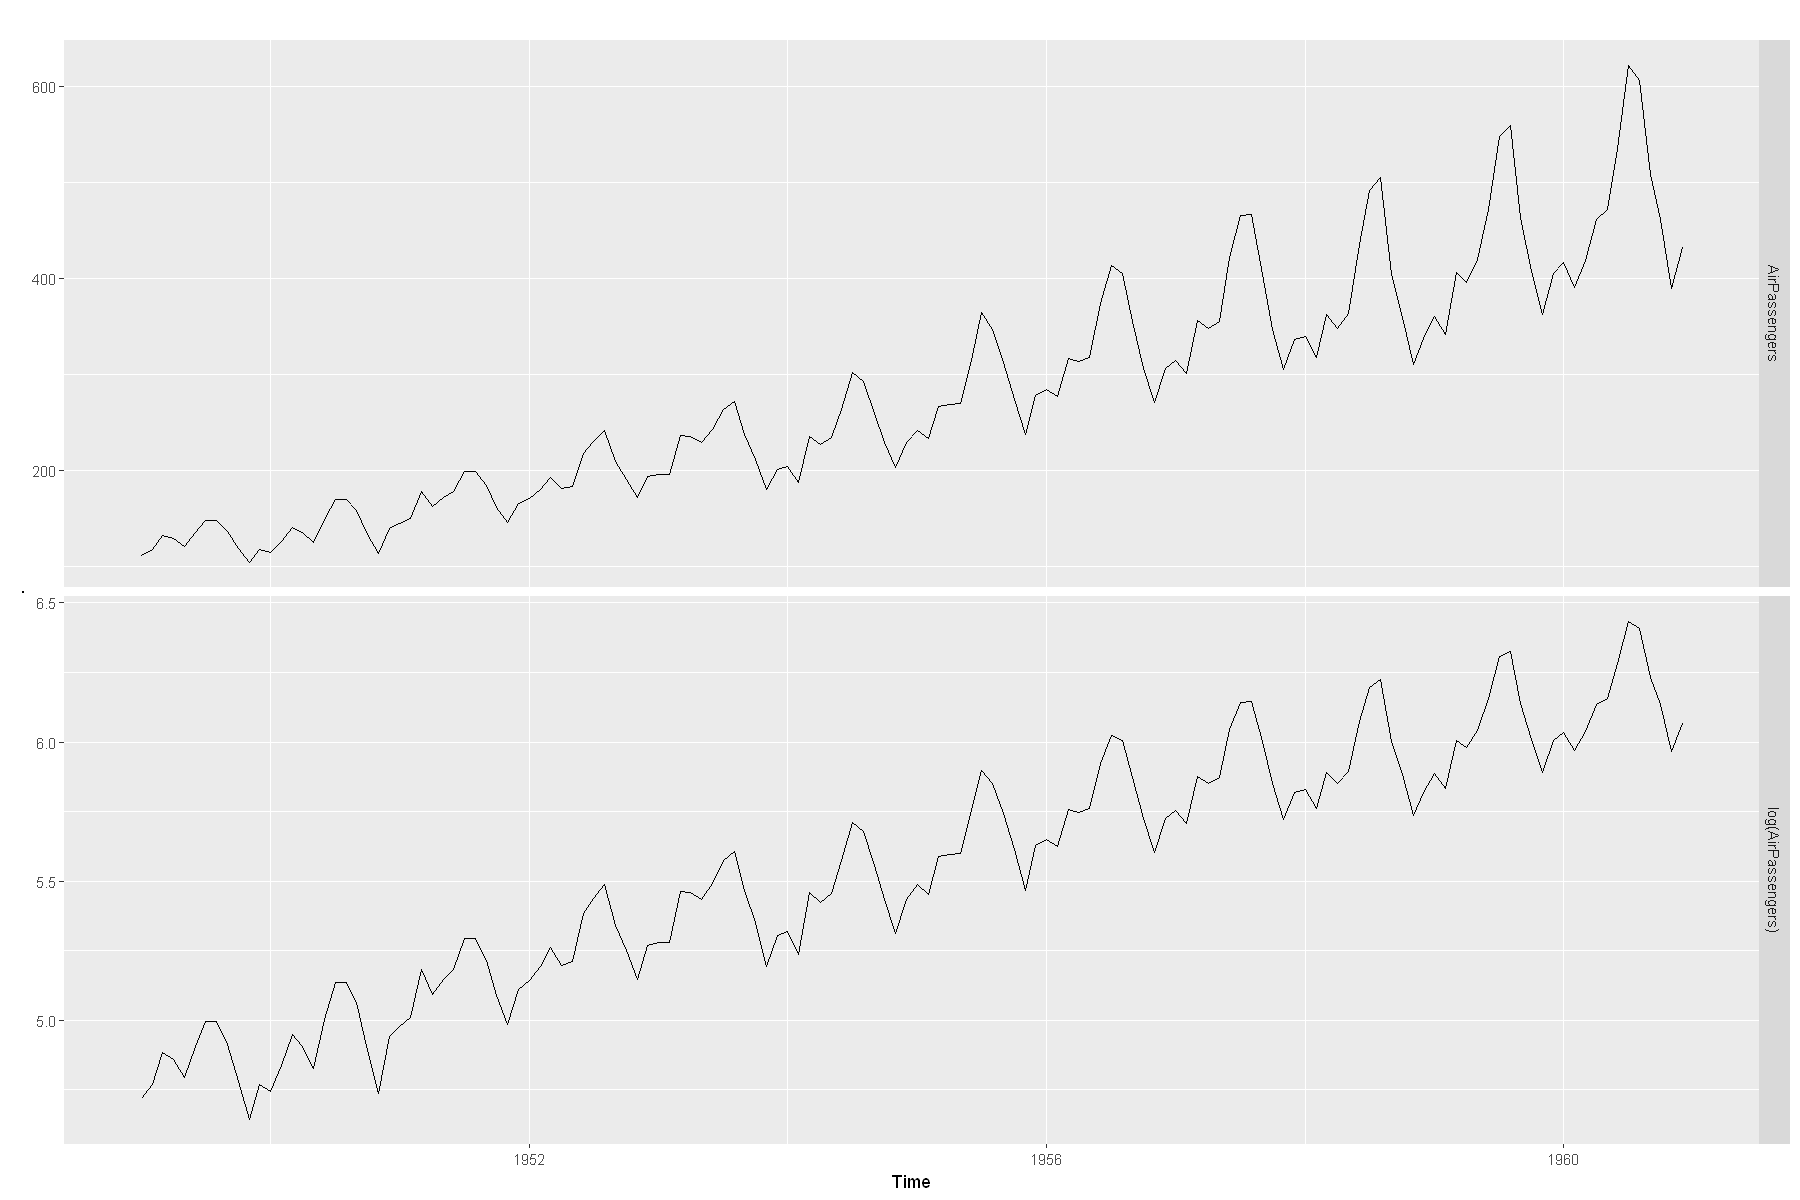

In [30]:
cbind(AirPassengers,log(AirPassengers)) %>%
autoplot(facets=TRUE)

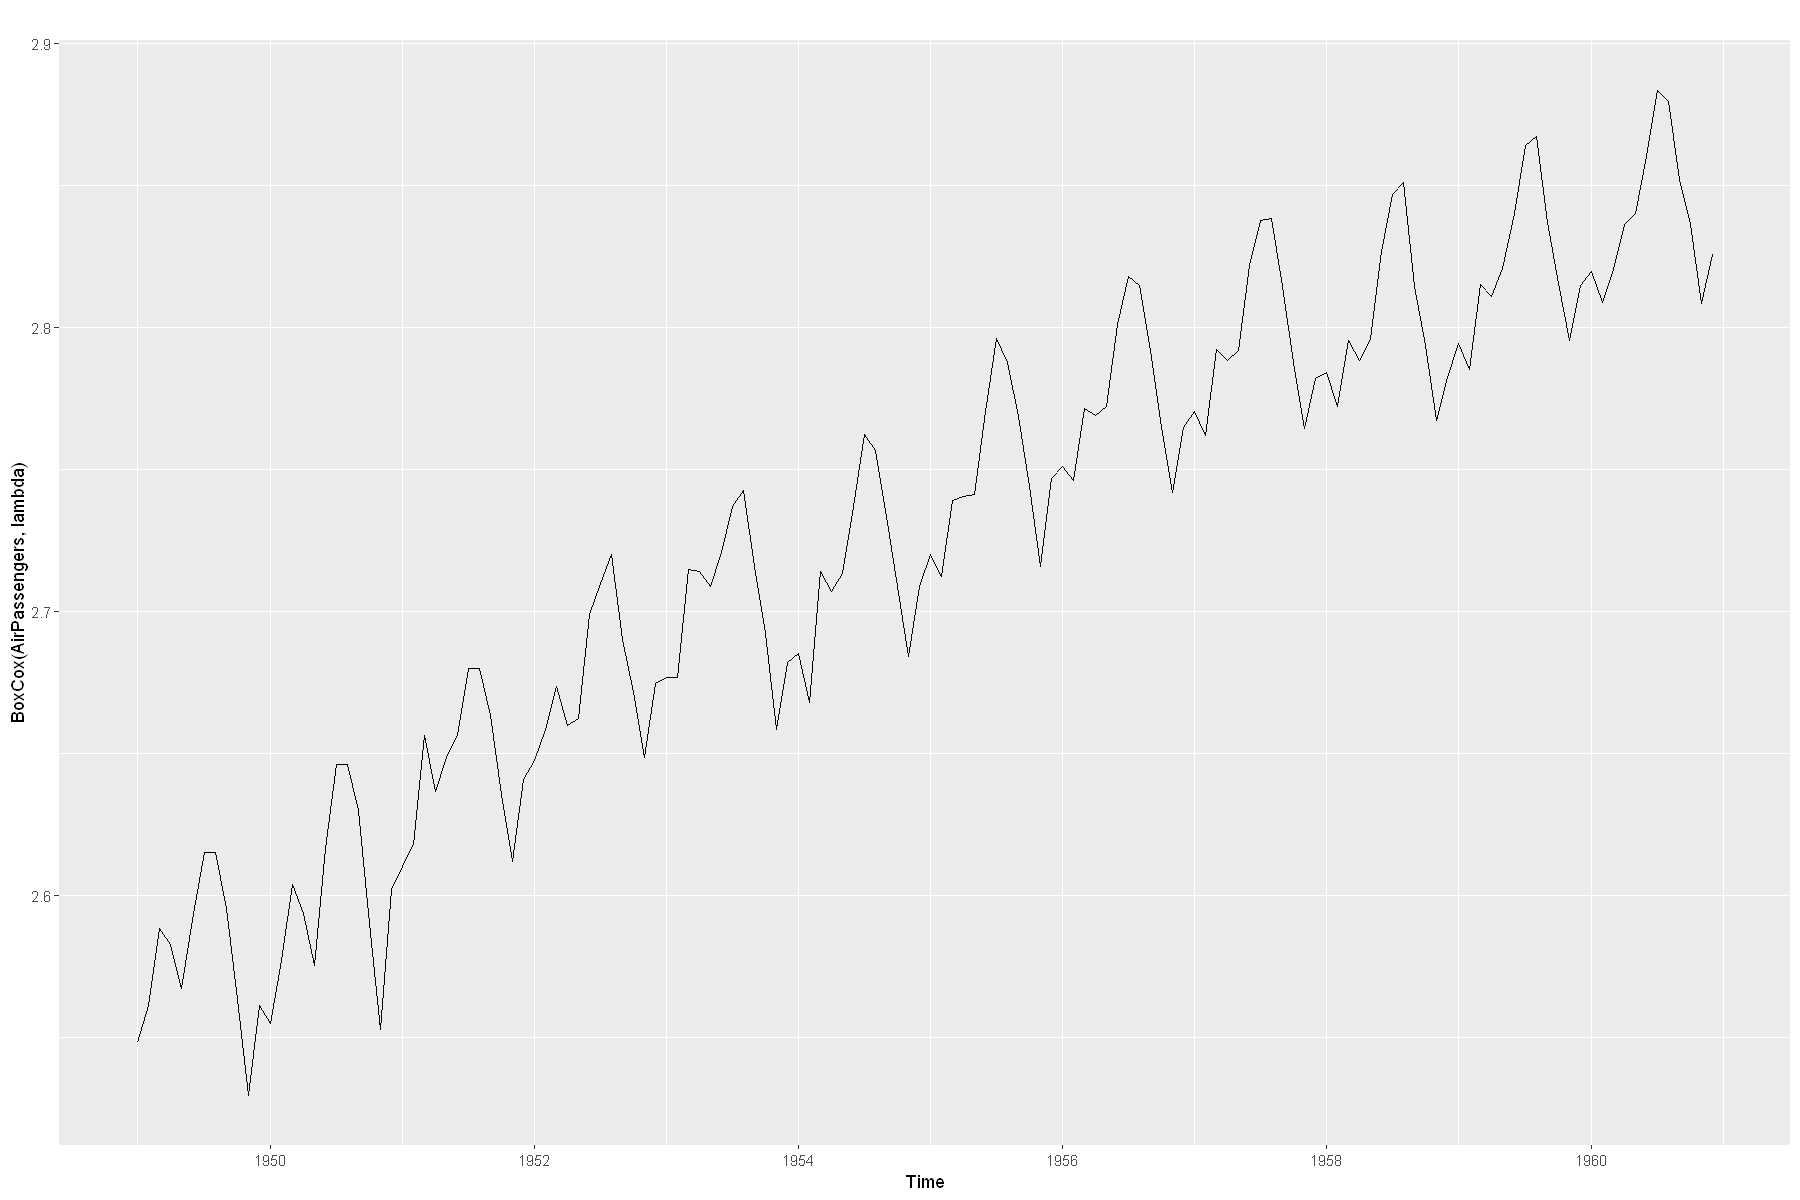

In [31]:
lambda=BoxCox.lambda(AirPassengers)
autoplot(BoxCox(AirPassengers,lambda))

In [32]:
train=window(AirPassengers,start=c(1949,1),end=c(1958,12))
test=window(AirPassengers,start=c(1959,1),end=c(1960,12))

In [33]:
ARIMA_LAMBDA = auto.arima(train, lambda = lambda)
prev=forecast(ARIMA_LAMBDA,h=24)
print(sqrt(mean((prev$mean-test)^2)))

[1] 32.5487


In [35]:
ARIMA = auto.arima(train)
prev_simples = forecast(ARIMA,h=24)
print(sqrt(mean((prev_simples$mean-test)^2)))

[1] 74.25224


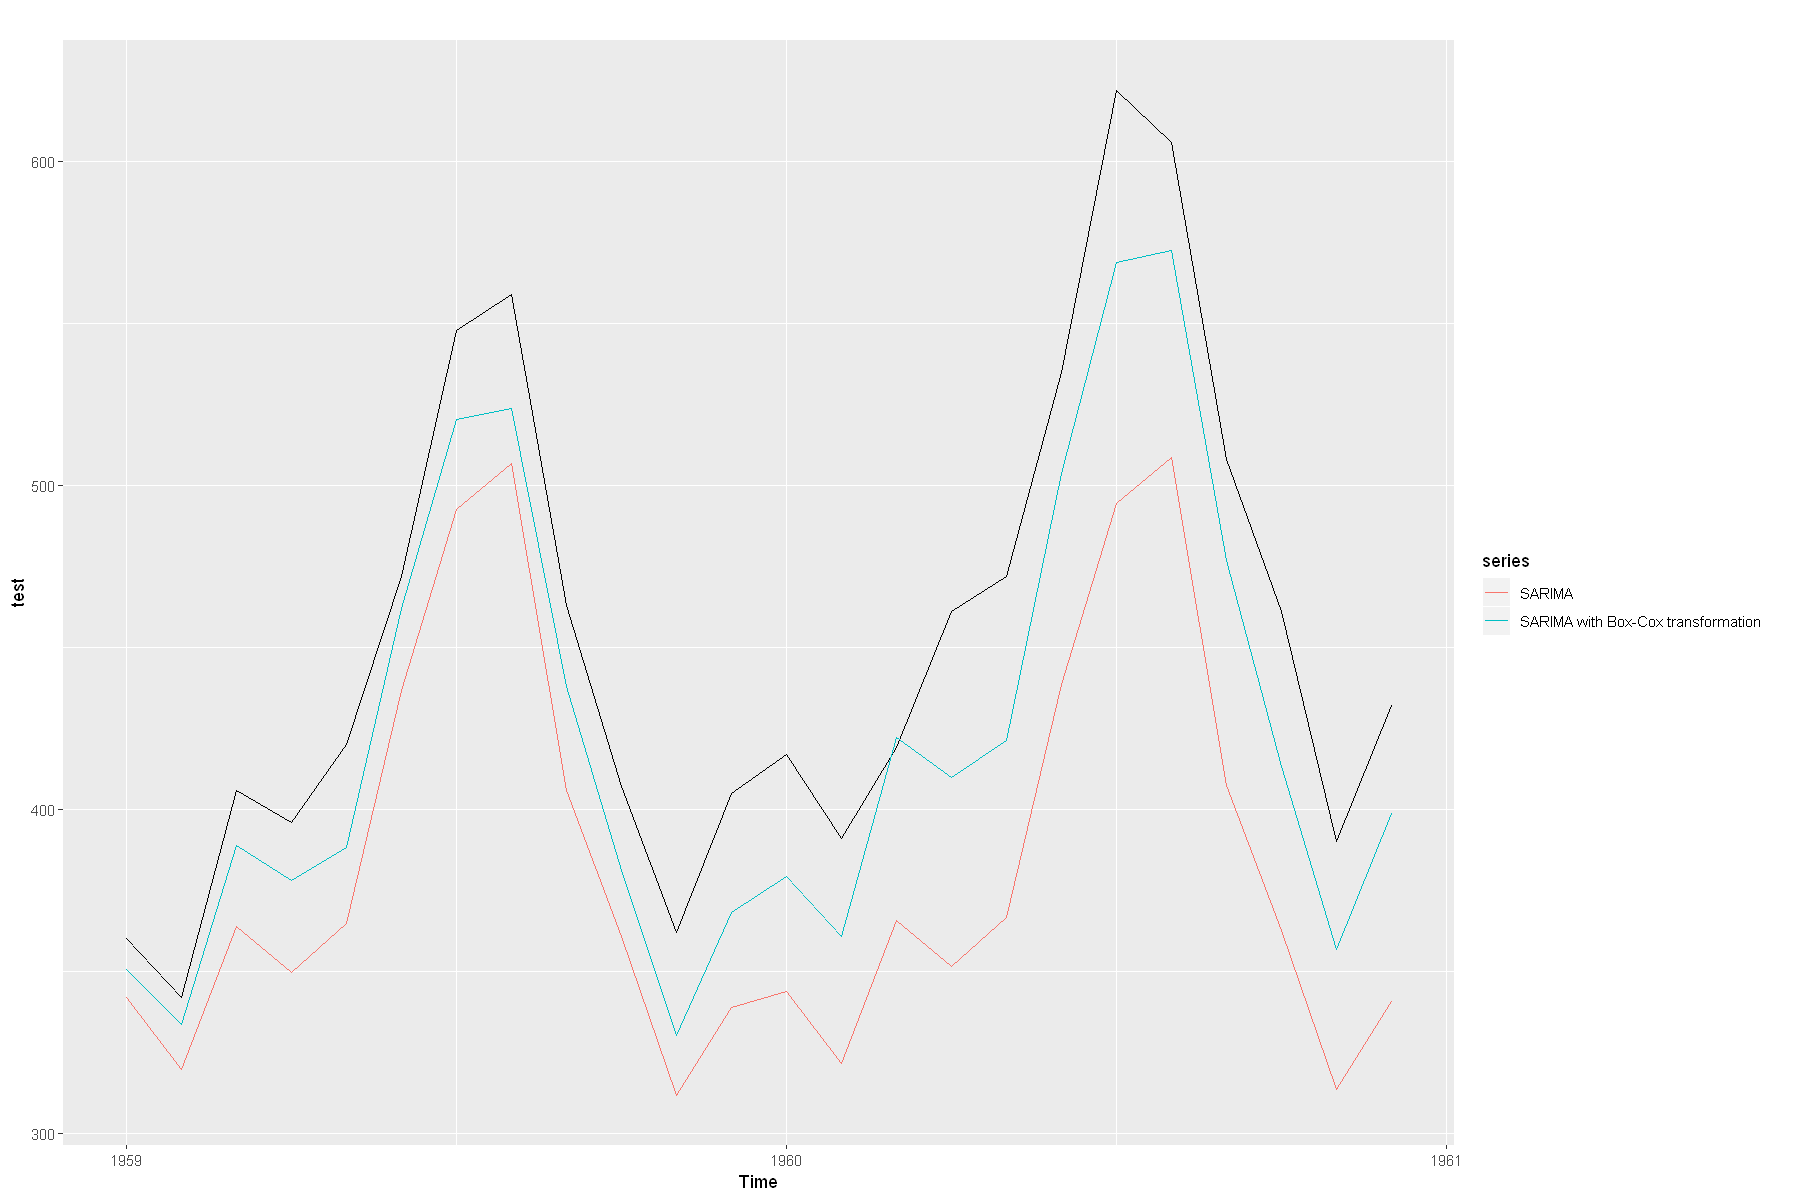

In [36]:
autoplot(test)+autolayer(prev$mean,series="SARIMA with Box-Cox transformation")+
autolayer(prev_simples$mean,series="SARIMA")

We see that the prediction using the transformation is much better.